In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as tfk 
from tensorflow.keras import layers as tfkl 

# change some settings

import os, sys, pathlib, watermark

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)
plt.rcParams['figure.figsize'] = (7,5)

2025-03-12 14:56:38.789553: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 14:56:38.824883: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-12 14:56:38.890924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741805798.976821    3573 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741805799.001973    3573 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 14:56:39.120055: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [3]:
print("python", sys.version.split("|")[0], "\n")

assert 'pandas' in sys.modules and "pd" in locals()
print(watermark.watermark(packages = "pandas"))

assert 'numpy' in sys.modules and "np" in locals()
print(watermark.watermark(packages = "numpy"))

assert 'sklearn' in sys.modules and "train_test_split" in locals()
print(watermark.watermark(packages = "sklearn"))

assert 'tensorflow' in sys.modules and "tf" in locals()
print(watermark.watermark(packages = "tensorflow"))

python 3.11.11  

pandas: 2.2.3

numpy: 2.0.2

sklearn: 1.6.1

tensorflow: 2.18.0



In [4]:
donkeys = pd.read_csv('kenya.csv')
donkeys

,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
0,3.0,<2,stallion,78,90,90,77,NaN
1,2.5,<2,stallion,91,97,94,100,NaN
2,1.5,<2,stallion,74,93,95,74,NaN
3,3.0,<2,female,87,109,96,116,NaN
4,2.5,<2,female,79,98,91,91,NaN
...,...,...,...,...,...,...,...,...
539,3.0,10-15,stallion,98,115,101,145,NaN
540,3.0,10-15,stallion,102,126,110,183,NaN
541,2.5,10-15,stallion,103,118,103,174,NaN
542,3.0,2-5,stallion,91,112,100,139,NaN


In [5]:
donkeys.shape

(544, 8)

In [6]:
donkeys.columns

Index(['BCS', 'Age', 'Sex', 'Length', 'Girth', 'Height', 'Weight',
       'WeightAlt'],
      dtype='object')

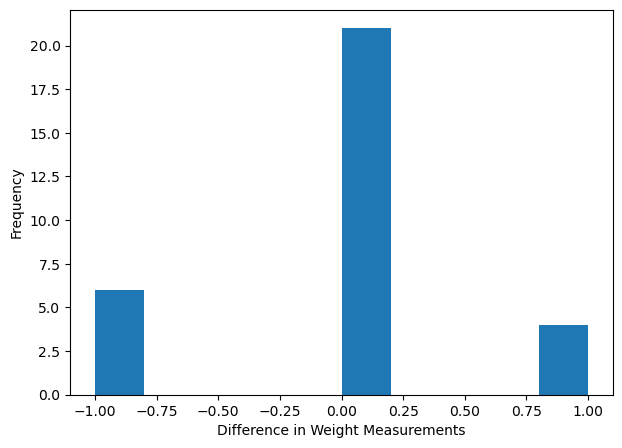

In [7]:
difference = donkeys['WeightAlt'] - donkeys['Weight']
plt.hist(difference.dropna())
plt.xlabel("Difference in Weight Measurements")
plt.ylabel("Frequency");

In [8]:
donkeys.select_dtypes(include = ['int64', "float64"]).quantile([0.005, 0.995])

,BCS,Length,Girth,Height,Weight,WeightAlt
0.005,1.5,71.145,90.000,89.0,71.715,98.75
0.995,4.0,111.000,131.285,112.0,214.000,192.80


In [9]:
donkeys.loc[(donkeys['Length'] < 71.145) | (donkeys['Length'] > 111), 'Length']

8       46
22      68
26      69
216    112
Name: Length, dtype: int64

In [10]:
donkeys.loc[(donkeys['Girth'] < 90) | (donkeys['Girth'] > 131.285), 'Girth']

8       66
239    132
283    134
523    134
Name: Girth, dtype: int64

In [11]:
donkeys.loc[(donkeys['Height'] < 89) | (donkeys['Height'] > 112), 'Height']

8       71
22      86
244    113
523    116
Name: Height, dtype: int64

In [12]:
donkeys[(donkeys['BCS'] < 1.5) | (donkeys['BCS'] > 4)]['BCS']

291    4.5
445    1.0
Name: BCS, dtype: float64

In [13]:
donkeys[(donkeys['Weight'] < 71.715) | (donkeys['Weight'] > 214)]['Weight']

8       27
26      65
50      71
291    227
523    230
Name: Weight, dtype: int64

In [14]:
donkeys_clean = donkeys.loc[
    (donkeys['BCS'] >= 1.5) & (donkeys['BCS'] <= 4) & 
    (donkeys['Weight'] >= 71) & (donkeys['Weight'] <= 214)
]

donkeys_clean

,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
0,3.0,<2,stallion,78,90,90,77,NaN
1,2.5,<2,stallion,91,97,94,100,NaN
2,1.5,<2,stallion,74,93,95,74,NaN
3,3.0,<2,female,87,109,96,116,NaN
4,2.5,<2,female,79,98,91,91,NaN
...,...,...,...,...,...,...,...,...
539,3.0,10-15,stallion,98,115,101,145,NaN
540,3.0,10-15,stallion,102,126,110,183,NaN
541,2.5,10-15,stallion,103,118,103,174,NaN
542,3.0,2-5,stallion,91,112,100,139,NaN


In [15]:
X_train, X_test, y_train, y_test = train_test_split(donkeys_clean.drop(['Weight', "WeightAlt"], axis=1),
                                                    donkeys_clean['Weight'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
X_train.shape, X_test.shape

((431, 6), (108, 6))

In [16]:
predictions = y_test
observations = y_test

mse = tf.reduce_mean(tf.square(predictions - observations))
mse

2025-03-12 15:00:42.149078: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [17]:
def mse_test_set(predictions, observations):
    return tf.reduce_mean(tf.square(predictions - observations))

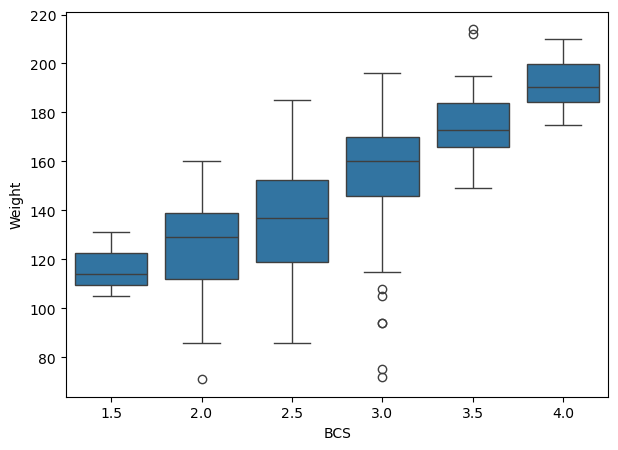

In [18]:
sns.boxplot(x=X_train['BCS'], y=y_train);

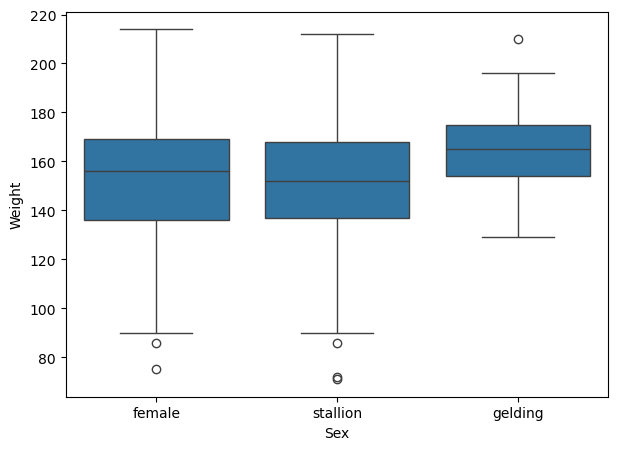

In [20]:
sns.boxplot(x=X_train['Sex'], y=y_train);

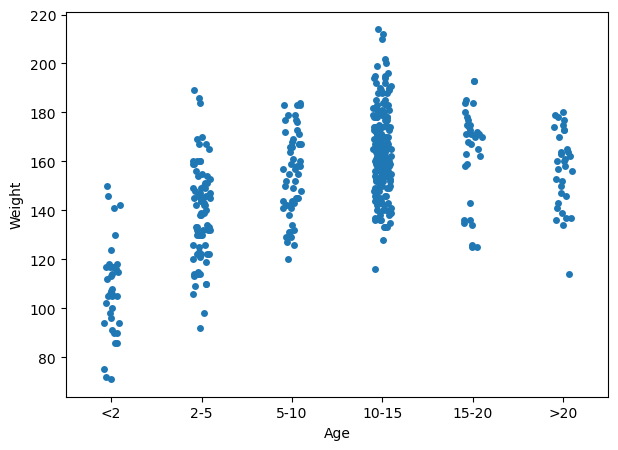

In [21]:
sns.stripplot(x=X_train["Age"], y=y_train, order=['<2', '2-5', '5-10', '10-15', '15-20', '>20']);

In [22]:
donkeys[['Length', 'Girth', 'Height', 'Weight']].corr()

,Length,Girth,Height,Weight
Length,1.000000,0.710049,0.631720,0.796800
Girth,0.710049,1.000000,0.730217,0.905642
Height,0.631720,0.730217,1.000000,0.731058
Weight,0.796800,0.905642,0.731058,1.000000


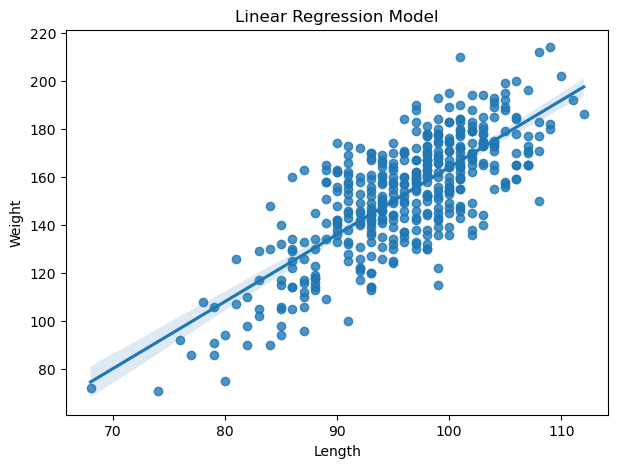

In [23]:
sns.regplot(x = X_train["Length"], y = y_train, fit_reg=True)
plt.title("Linear Regression Model");

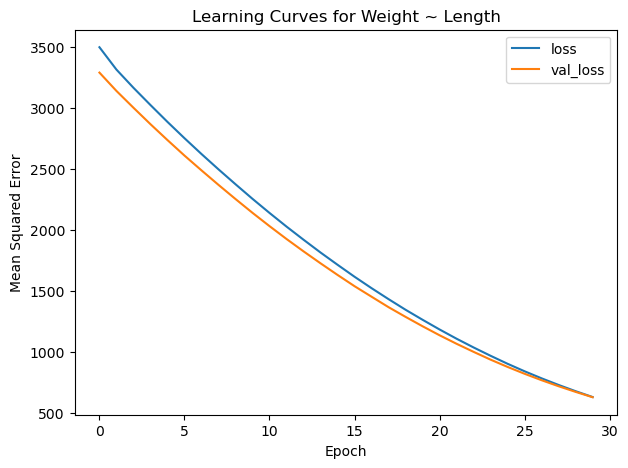

In [25]:
model_length = tfk.Sequential([tfkl.InputLayer(shape = (1,)), 
                               tfkl.Dense(1, activation="linear", kernel_initializer="ones", use_bias=True, bias_initializer="zeros")])

model_length.compile(optimizer = "rmsprop", loss = "mse")

history_length = model_length.fit(X_train["Length"], 
                           y_train, 
                           validation_data=(X_test["Length"], y_test),
                           epochs=30, 
                           verbose=0)
pd.DataFrame(history_length.history).plot()

plt.title("Learning Curves for Weight ~ Length")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error");

In [29]:
Out_of_sample_Mean_Square_Error_during_the_last_Epoch_of_training = history_length.history["val_loss"][-1]
Out_of_sample_Mean_Square_Error_during_the_last_Epoch_of_training

629.4874877929688

In [30]:
model_girth = tfk.Sequential([tfkl.InputLayer(shape = (1,)),
tfkl.Dense(1, activation="linear",
kernel_initializer="ones", use_bias=True, bias_initializer="zeros")])
model_girth.compile(optimizer = "rmsprop", loss = "mse")
history_girth = model_girth.fit(X_train["Girth"],
y_train,
validation_data=(X_test["Girth"], y_test),
epochs=30,
verbose=0)
print(history_girth.history["val_loss"][-1])

388.6729736328125


In [31]:
model_height = tfk.Sequential([tfkl.InputLayer(shape = (1,)),
tfkl.Dense(1, activation="linear",
kernel_initializer="ones", use_bias=True, bias_initializer="zeros")])
model_height.compile(optimizer = "rmsprop", loss = "mse")
history_height = model_height.fit(X_train["Height"],
y_train,
validation_data=(X_test["Height"], y_test),
epochs=30,
verbose=0)
print(history_height.history["val_loss"][-1])

619.6636352539062


Text(0, 0.5, 'Mean Squared Error')

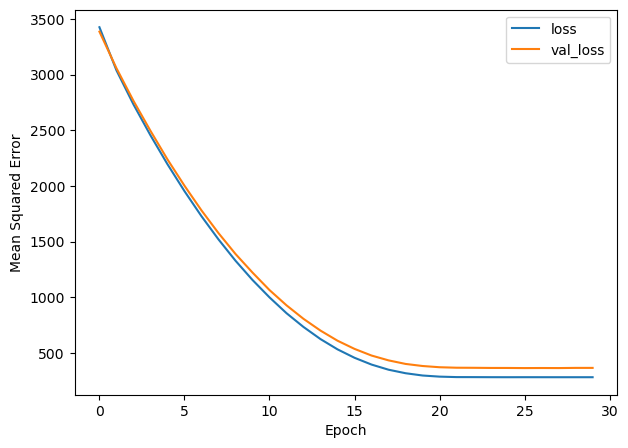

In [32]:
model_length_girth = tfk.Sequential([tfkl.InputLayer(shape = (2,)),
tfkl.Dense(1, activation="linear",
kernel_initializer="ones", use_bias=True, bias_initializer="zeros")])
model_length_girth.compile(optimizer = "rmsprop", loss = "mse")
history_length_girth = model_length_girth.fit(X_train[["Girth", "Length"]],
y_train,
validation_data=(X_test[["Girth", "Length"]],
y_test),
epochs=30,
verbose=0)
pd.DataFrame(history_length_girth.history).plot()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

In [34]:
Out_of_sample_Mean_Square_Error_during_the_last_Epoch_of_training = history_length_girth.history["val_loss"][-1]
Out_of_sample_Mean_Square_Error_during_the_last_Epoch_of_training

364.3977966308594

In [35]:
X_train = pd.get_dummies(X_train, columns = ["BCS", "Age"])
X_train

,Sex,Length,Girth,Height,BCS_1.5,BCS_2.0,BCS_2.5,...,BCS_4.0,Age_10-15,Age_15-20,Age_2-5,Age_5-10,Age_<2,Age_>20
465,female,98,113,99,False,False,False,...,False,False,False,True,False,False,False
233,stallion,101,119,101,False,False,False,...,False,True,False,False,False,False,False
450,female,106,125,103,False,False,True,...,False,True,False,False,False,False,False
453,stallion,93,120,100,False,False,True,...,False,False,False,True,False,False,False
452,female,98,120,108,False,False,True,...,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,female,90,112,104,False,False,True,...,False,False,False,True,False,False,False
108,female,106,121,104,False,False,False,...,False,True,False,False,False,False,False
272,female,95,123,99,False,False,False,...,False,False,False,False,True,False,False
438,stallion,97,103,94,False,False,False,...,False,False,False,True,False,False,False


In [36]:
X_train['Age_>5'] = (X_train['Age_5-10'] | X_train['Age_10-15'] | X_train['Age_15-20'] | X_train['Age_>20']) 
X_train.drop(['Age_5-10', 'Age_10-15', 'Age_15-20', 'Age_>20'], axis=1, inplace=True)
X_train

,Sex,Length,Girth,Height,BCS_1.5,BCS_2.0,BCS_2.5,BCS_3.0,BCS_3.5,BCS_4.0,Age_2-5,Age_<2,Age_>5
465,female,98,113,99,False,False,False,True,False,False,True,False,False
233,stallion,101,119,101,False,False,False,True,False,False,False,False,True
450,female,106,125,103,False,False,True,False,False,False,False,False,True
453,stallion,93,120,100,False,False,True,False,False,False,True,False,False
452,female,98,120,108,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,female,90,112,104,False,False,True,False,False,False,True,False,False
108,female,106,121,104,False,False,False,True,False,False,False,False,True
272,female,95,123,99,False,False,False,False,True,False,False,False,True
438,stallion,97,103,94,False,False,False,True,False,False,True,False,False


Text(0, 0.5, 'Mean Squared Error')

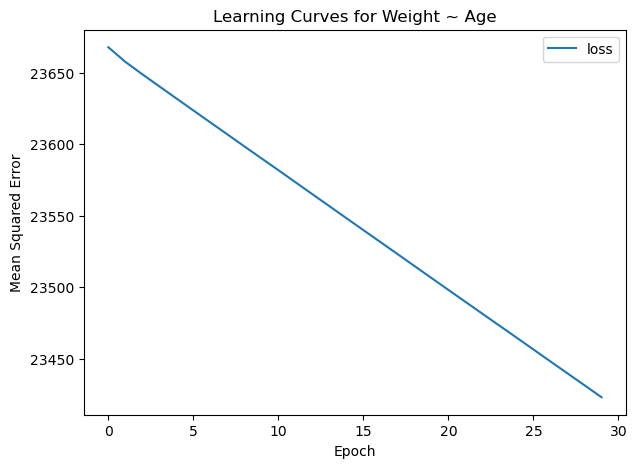

In [37]:
model_age = tfk.Sequential([tfkl.InputLayer(shape = (3,)),
tfkl.Dense(1, activation="linear",
kernel_initializer="ones", use_bias=True, bias_initializer="zeros")])
model_age.compile(optimizer = "rmsprop", loss = "mse")
history_age = model_age.fit(X_train[["Age_2-5", "Age_<2", "Age_>5"]],y_train,
epochs=30,
verbose=0)
pd.DataFrame(history_age.history).plot()
plt.title("Learning Curves for Weight ~ Age")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

In [38]:
predictions_age = history_age.history["loss"][-1]

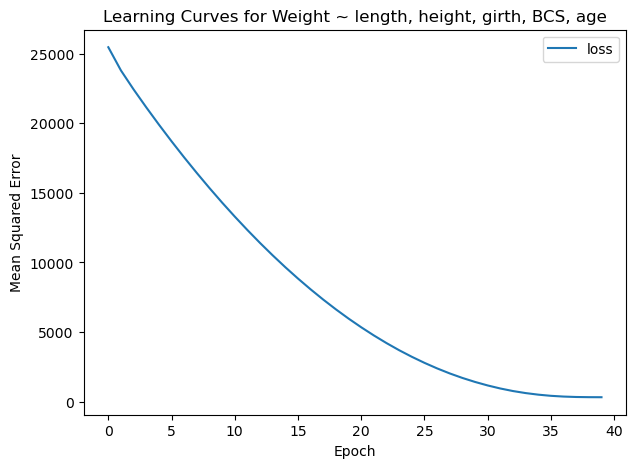

In [39]:
X_train = X_train.drop(columns=["Sex"])
X_train = X_train.astype("float32")
model = tfk.Sequential([tfkl.InputLayer(shape = (12,)),
tfkl.Dense(1, activation="linear",
kernel_initializer="ones", use_bias=True, bias_initializer="zeros")])
model.compile(optimizer = "rmsprop", loss = "mse")
history = model.fit(
X_train,
y_train,
epochs=40,
verbose=0)
pd.DataFrame(history.history).plot()
plt.title("Learning Curves for Weight ~ length, height, girth, BCS, age")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error");

In [40]:
X_test = pd.get_dummies(X_test, columns = ["BCS", "Age"])
X_test['Age_>5'] = (X_test['Age_5-10'] | X_test['Age_10-15'] | X_test['Age_15-20'] | X_test['Age_>20']) 
X_test.drop(['Age_5-10', 'Age_10-15', 'Age_15-20', 'Age_>20'], axis=1, inplace=True)
X_test.drop(columns = "Sex", inplace = True)
X_test = X_test.astype("float32")
X_test

,Length,Girth,Height,BCS_1.5,BCS_2.0,BCS_2.5,BCS_3.0,BCS_3.5,BCS_4.0,Age_2-5,Age_<2,Age_>5
490,98.0,119.0,103.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
75,86.0,114.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
352,94.0,114.0,101.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
88,86.0,104.0,94.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
461,101.0,117.0,103.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,118.0,101.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
328,100.0,115.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
182,94.0,114.0,102.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
334,104.0,113.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
MSE_test = mse_test_set(model.predict(X_test).squeeze(), y_test)
MSE_test

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


<tf.Tensor: shape=(), dtype=float64, numpy=416.87884564599653>

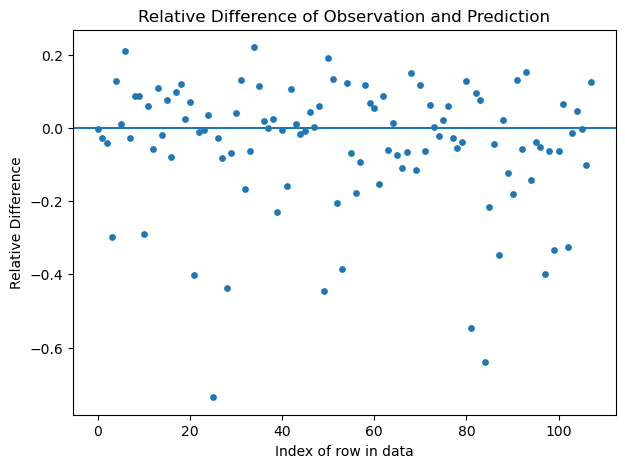

In [43]:
relative_difference = (y_test.values - model(X_test).numpy().squeeze()) / y_test.values
plt.scatter(np.arange(len(relative_difference)), relative_difference, s=15)
plt.axhline(0)

plt.title('Relative Difference of Observation and Prediction')
plt.xlabel('Index of row in data')
plt.ylabel('Relative Difference');